<a href="https://colab.research.google.com/github/KishanRaj0007/ML-Assignment/blob/main/Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
titanic_data = pd.read_csv("/content/titanic.csv", sep =',')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# find missing values in each column
missing_values = titanic_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# drop some columns from the data.
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic_data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# convert 'male' to 1 and 'female' to 0 5.
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 1, 'female': 0})

In [ ]:
# fill missing values in 'Age' column.
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'])

In [ ]:
# split the Input and Output columns.
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# initializing train logistics Regression model
logistic_model = LogisticRegression()
# train the model
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Model Accuracy:", accuracy_logistic)

Logistic Regression Model Accuracy: 0.7988826815642458


In [ ]:
# Initializing Gaussian Naive-Bayes Model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_naive_bayes = naive_bayes_model.predict(X_test)
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
print("Gaussian Naive-Bayes Model Accuracy:", accuracy_naive_bayes)

Gaussian Naive-Bayes Model Accuracy: 0.776536312849162


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression Model
print("Logistic Regression Model:")
# Classification score
print("Classification Score:")
print(classification_report(y_test, y_pred_logistic))
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))


Logistic Regression Model:
Classification Score:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
[[88 17]
 [19 55]]


In [ ]:
# Gaussian Naive-Bayes Model
print("\nGaussian Naive-Bayes Model:")
# Classification score
print("Classification Score:")
print(classification_report(y_test, y_pred_naive_bayes))
# Confusion Matrix
print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_naive_bayes))


Gaussian Naive-Bayes Model:
Classification Score:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179


Confusion Matrix:
[[82 23]
 [17 57]]


**Question Number 2**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Load the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/Sonar.csv"
sonar_data = pd.read_csv(url)

In [ ]:
# Separate features and labels
X = sonar_data.drop(columns=['Class'])
y = sonar_data['Class']

In [ ]:
# Number of clusters (assuming 2 classes: Rock and Mine)
n_clusters = 2

In [ ]:
# Initialize and fit K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [ ]:
# Predict cluster labels
cluster_labels = kmeans.predict(X)

In [ ]:
# Calculate the number of data points mis-grouped
misgrouped = np.sum(cluster_labels != (y == 'Mine').astype(int))

In [ ]:
# Print the number of mis-grouped data points
print("Number of mis-grouped data points:", misgrouped)

Number of mis-grouped data points: 110


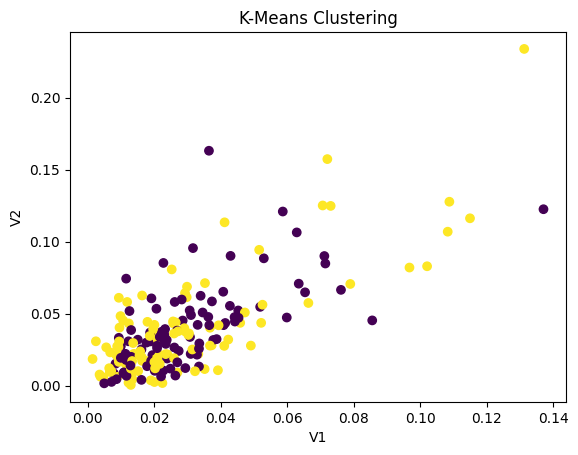

In [ ]:
# Plot a 2D graph using two features as x-axis and y-axis
feature1 = 'V1'  # Choose any feature
feature2 = 'V2'  # Choose any feature
plt.scatter(X[feature1], X[feature2], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()